# Vizualizing with TensorBoard

Connect (click link)
http://localhost:8082

In [62]:
import subprocess as subp
import time
import os
from IPython.display import HTML

In [63]:
# Start Tensor Board
logdir = '/tmp/test'
!rm -rf $logdir
!mkdir -p $logdir
port = 8082
tb = subp.Popen(["tensorboard", "--logdir=" + logdir,"--host=0.0.0.0", "--port=" + str(port)])
time.sleep(15)
!ls $logdir

In [64]:
# Load TensorBoard also in this notebook:
HTML('<iframe src=http://localhost:8082 width=1024 height=900></iframe>')

code: https://github.com/MorvanZhou/tutorials/tree/master/tensorflowTUT
playlist: https://www.youtube.com/playlist?list=PLXO45tsB95cJHXaDKpbwr5fC_CCYylw1f
Video for this notebook


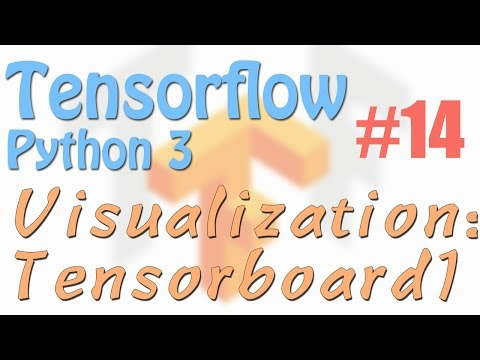

In [65]:
from IPython.display import YouTubeVideo
print ("code: https://github.com/MorvanZhou/tutorials/tree/master/tensorflowTUT")
print ("playlist: https://www.youtube.com/playlist?list=PLXO45tsB95cJHXaDKpbwr5fC_CCYylw1f")
print "Video for this notebook"
YouTubeVideo('FtxpjxFi2vk')

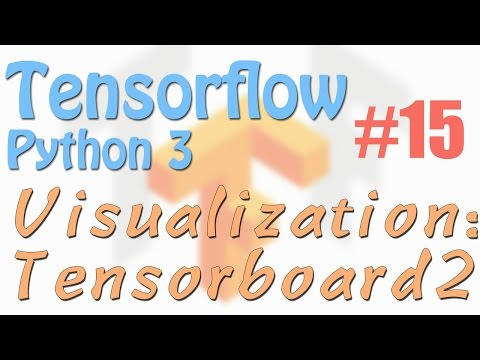

In [66]:
YouTubeVideo('zp5EtBvwQbw')

In [67]:
# Run a linear fit and add stuff to the tensorboard!

In [68]:
# Let's do something, and see what things look like on the TensorBoard!

import tensorflow as tf
import pandas as pd
import sys
import tqdm
if 'seaborn' not in sys.modules:
    %pylab inline
    import seaborn
tf.reset_default_graph()
sess = tf.InteractiveSession()

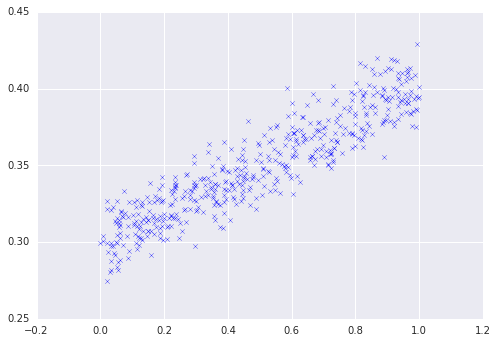

In [69]:
# generate data

n_data = 500
x_data = np.random.rand(n_data).astype(np.float32)
y_data = x_data*0.1 + 0.3 + np.random.normal(loc=0, scale=0.013, size=n_data)
plt.scatter(x_data, y_data, marker='x')


In [70]:
# Define a few variables and processes within some layer
# merge_all_summaries does not work for me, but manual merging works great.
summaries = []
with tf.name_scope('fit_parameters'):
    m = tf.Variable(tf.random_uniform([1],-1.,1.), name="var_m")
    summaries.append(tf.scalar_summary("m", m[0]))
    c = tf.Variable(tf.random_uniform([1],-0.5,0.5), name="var_c")
    summaries.append(tf.scalar_summary("c", c[0]))

with tf.name_scope('inputs'):
    x_holder = tf.placeholder(tf.float32, name='x_generated')
    y_holder = tf.placeholder(tf.float32, name='y_generated')

with tf.name_scope('fitter'):
    y = m*x_holder + c
    penalty = tf.reduce_mean(tf.square(y - y_holder))
    summaries.append(tf.scalar_summary("lsq", penalty))
    optimizer = tf.train.GradientDescentOptimizer(0.15)
    train = optimizer.minimize(penalty)


In [71]:
run = lambda f: sess.run(f, feed_dict={x_holder: x_data, y_holder: y_data})

## to re-run the fitting, run from here ...

In [85]:
init = tf.initialize_all_variables()
sess.run(init)

In [86]:
merge_op = tf.merge_summary(summaries)

In [87]:
try:
    n_run = n_run + 1
except NameError:
    n_run = 1

In [88]:
! mkdir -p /tmp/test/$n_run
writer = tf.train.SummaryWriter('/tmp/test/'+ str(n_run), sess.graph)

100%|██████████| 250/250 [00:00<00:00, 1566.37it/s]


(0.18067878, array([ 0.57428592], dtype=float32), array([-0.19427754], dtype=float32))
(0.010793762, array([ 0.44298622], dtype=float32), array([ 0.11826766], dtype=float32))
(0.003933005, array([ 0.30501491], dtype=float32), array([ 0.19146062], dtype=float32))
(0.0015034449, array([ 0.22291011], dtype=float32), array([ 0.23501575], dtype=float32))
(0.00064307876, array([ 0.1740509], dtype=float32), array([ 0.26093468], dtype=float32))
(0.00033840217, array([ 0.14497557], dtype=float32), array([ 0.27635863], dtype=float32))
(0.0002305089, array([ 0.12767334], dtype=float32), array([ 0.28553715], dtype=float32))
(0.00019230129, array([ 0.11737709], dtype=float32), array([ 0.29099911], dtype=float32))
(0.00017877105, array([ 0.11124994], dtype=float32), array([ 0.29424948], dtype=float32))
(0.00017397961, array([ 0.10760375], dtype=float32), array([ 0.29618371], dtype=float32))


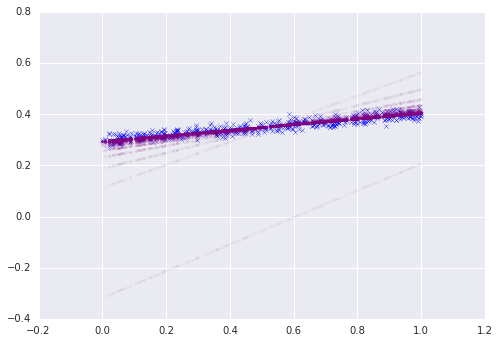

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_data, y_data, marker='x')


n_step = 250
for step in tqdm.tqdm(range(n_step)):
    if (20*step)%n_step!=0:
        _ = run(train)
    else:
        _, ipenalty, im, ic, ixs, iy, result = run([train, penalty, m, c, x_holder, y, merge_op])
        print(ipenalty,im,ic)
        writer.add_summary(result, step)
        ax.scatter(ixs, iy, marker='.', color='purple', alpha=(0.01 + step*step*step/float(n_step*n_step*n_step)))

In [77]:
# Kill if necessary
tb.kill()